- https://medium.com/@robdelacruz/frank-rosenblatts-perceptron-19fcce9d627f
- https://medium.com/data-science/classification-with-rosenblatts-perceptron-e7f49e3af562

In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        """
        Fits the perceptron model to the training data.

        Args:
            X (array-like): Training data, shape (n_samples, n_features).
            y (array-like): Target values, shape (n_samples,).
        """
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)

        for _ in range(self.epochs):
            for i in range(len(X)):
                y_predicted = self.predict(X[i])
                # Update weights and bias if misclassified
                if y[i] * y_predicted <= 0:
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]

    def predict(self, x):
        """
        Predicts the class label for a given input.

        Args:
            x (array-like): Input data, shape (n_features,).

        Returns:
            int: Predicted class label (1 or -1).
        """
        linear_output = np.dot(x, self.weights) + self.bias
        return 1 if linear_output >= 0 else -1

Test Accuracy: 66.67%


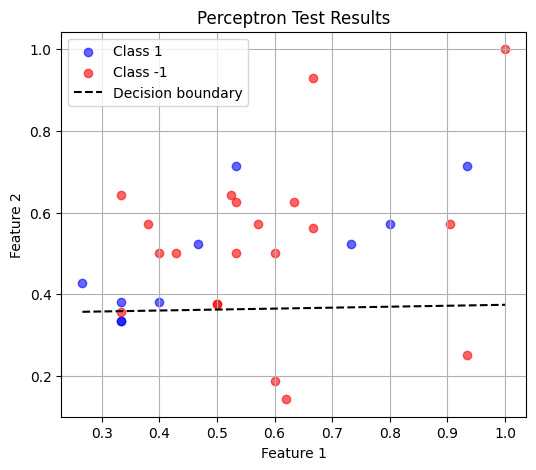

In [106]:
# Load dataset
df = pd.read_csv("Percobaan3_622022003.csv")
X = df.drop(columns="species").values
y = df["species"].values

# Binary classification: 1 for setosa (label 0), -1 for others
y_binary = np.where(y == 0.0, 1, -1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train perceptron
model = Perceptron(learning_rate=0.01, epochs=100)
model.fit(X_train, y_train)

# Predict test data
y_pred = np.array([model.predict(x) for x in X_test])
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 2D Visualization (first 2 features)
plt.figure(figsize=(6, 5))
for label, color in zip([1, -1], ['blue', 'red']):
    idx = y_test == label
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, label=f"Class {label}", alpha=0.6)

# Decision boundary (approximate, only for 2D)
x_vals = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
if model.weights[1] != 0:
    y_vals = -(model.weights[0] * x_vals + model.bias) / model.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision boundary')

plt.title("Perceptron Test Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

          f0        f1        f2        f3  True Label  Predicted
0   0.571429  0.571429  0.809524  0.250000          -1         -1
1   0.933333  0.714286  0.777778  0.400000           1         -1
2   0.933333  0.250000  1.000000  0.818182          -1         -1
3   0.523810  0.642857  0.714286  0.625000          -1         -1
4   0.904762  0.571429  0.857143  0.500000          -1         -1
5   0.733333  0.523810  0.555556  0.600000           1         -1
6   0.333333  0.642857  0.285714  0.375000          -1         -1
7   0.666667  0.562500  0.250000  0.818182          -1         -1
8   0.619048  0.142857  0.714286  0.625000          -1         -1
9   0.428571  0.500000  0.428571  0.250000          -1         -1
10  0.533333  0.625000  0.250000  0.545455          -1         -1
11  0.333333  0.333333  0.444444  0.000000           1         -1
12  0.800000  0.571429  0.333333  0.200000           1         -1
13  0.400000  0.380952  0.555556  0.000000           1         -1
14  0.5333

Text(0, 0.5, 'Feature 1')

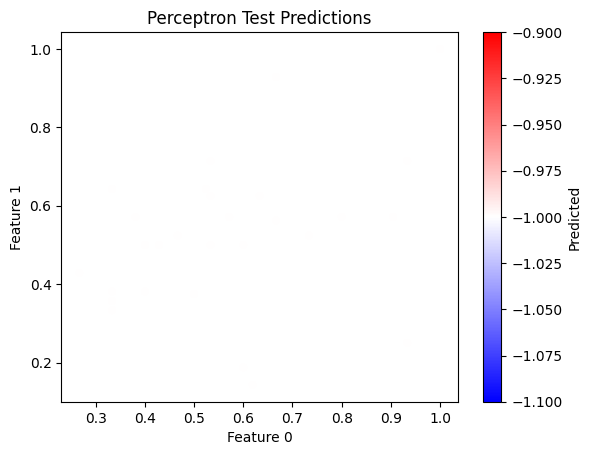

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("Percobaan3_622022003.csv")
X = df.drop(columns="species").values
y = df["species"].values
y_binary = np.where(y == 0.0, 1, -1)  # 1 = setosa, -1 = not setosa

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train your Perceptron
model = Perceptron(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = np.array([model.predict(x) for x in X_test])
# print(y_pred)
# print(y_test)
# Put into DataFrame for plotting
df_plot = pd.DataFrame(X_test, columns=[f"f{i}" for i in range(X.shape[1])])
df_plot["True Label"] = y_test
df_plot["Predicted"] = y_pred
print(df_plot)
# Plot using two features (f0 and f1) and color by prediction
ax = df_plot.plot.scatter(x="f0", y="f1", c="Predicted", colormap="bwr", alpha=1, title="Perceptron Test Predictions",)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")